In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/project/ground_water_quality_2018_post.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/project/ground_water_quality_2019_post.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/project/ground_water_quality_2020_post.csv')

In [ ]:
df_1.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [ ]:
df_1.shape

(374, 26)

In [ ]:
df_1.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 3
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [ ]:
df_1.fillna(df_1.mean(),inplace=True)

<ipython-input-7-c5de193cdd47>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.fillna(df_1.mean(),inplace=True)


In [ ]:
df_2.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,EC,...,SO4-2,Na+,K+,Ca+2,Mg+2,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,6.45,post monsoon 2019,8.32,2355,...,377.0,273.0,113.0,80.0,82.654,539.860197,5.108509,C4S2,-3.797204,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.85,post monsoon 2019,8.30,565,...,52.0,89.0,14.0,48.0,4.862,139.991776,3.196982,C2S1,1.200164,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.45,post monsoon 2019,8.12,766,...,43.0,39.0,10.0,40.0,24.310,199.958882,1.199130,C3S1,-0.199178,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,3.95,post monsoon 2019,7.09,555,...,31.0,40.0,5.0,40.0,24.310,199.958882,1.229877,C2S1,0.400822,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,post monsoon 2019,7.97,735,...,28.0,44.0,16.0,72.0,34.034,319.942434,0.996598,C2S1,0.401151,P.S.


In [ ]:
df_2.shape

(364, 26)

In [ ]:
df_2.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   5
season                0
pH                    0
EC                    0
TDS                   0
CO_-2               160
HCO_ -                0
Cl -                  0
F -                   0
NO3-                  0
SO4-2                 0
Na+                   0
K+                    0
Ca+2                  0
Mg+2                  0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [ ]:
replaced_names={'CO_-2 ':'CO3', 'HCO_ - ':'HCO3', 'Cl -':'Cl', 'F -':'F','NO3- ':'NO3 ', 'SO4-2':'SO4', 'Na+':'Na', 'K+':'K', 'Ca+2':'Ca', 'Mg+2':'Mg','EC':'E.C'}
df_2.rename(columns=replaced_names,inplace=True)

In [ ]:
df_2.fillna(df_2.mean(), inplace=True)

<ipython-input-12-a9feef9bec42>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.fillna(df_2.mean(), inplace=True)


In [ ]:
df_3.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,7.10,Post-monsoon 2020,NaN,8.01,...,33.00,171.0,9.0,24.0,72.930,359.876645,3.919146,C3S1,0.602467,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.35,Post-monsoon 2020,NaN,7.77,...,13.50,70.0,3.0,16.0,53.482,259.909539,1.887814,C3S1,-0.198191,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,5.05,Post-monsoon 2020,NaN,8.21,...,10.50,65.0,3.0,16.0,48.620,239.917763,1.824544,C2S1,0.001645,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,2.10,Post-monsoon 2020,NaN,8.3,...,7.25,31.0,1.0,16.0,29.172,159.950658,1.065714,C2S1,-0.199013,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,1.38,Post-monsoon 2020,NaN,7.67,...,14.50,129.0,2.0,32.0,5.000,82.878289,6.160862,C2S1,3.742434,U.S.


In [ ]:
df_3.shape

(368, 27)

In [ ]:
df_3.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [ ]:
df_3.drop('Unnamed: 8',axis=1,inplace=True)

In [ ]:
df_3.fillna(df_3.mean(), inplace=True)

<ipython-input-17-344e6701ce16>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_3.fillna(df_3.mean(), inplace=True)


In [ ]:
df=pd.concat([df_1,df_2,df_3])

In [ ]:
df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [ ]:
df.shape

(1106, 26)

In [ ]:
df.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [ ]:
df['Classification'].unique()

array(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1',
       'C3S4', 'C3S3', 'C2S2', 'OG', 'O.G'], dtype=object)

In [ ]:
df['Classification']=df['Classification'].replace({'O.G':'OG'})

In [ ]:
numcol=['lat_gis', 'long_gis', 'gwl','pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']

In [ ]:
df.loc[261,'pH']=8.05
df['pH']=df['pH'].astype(float)

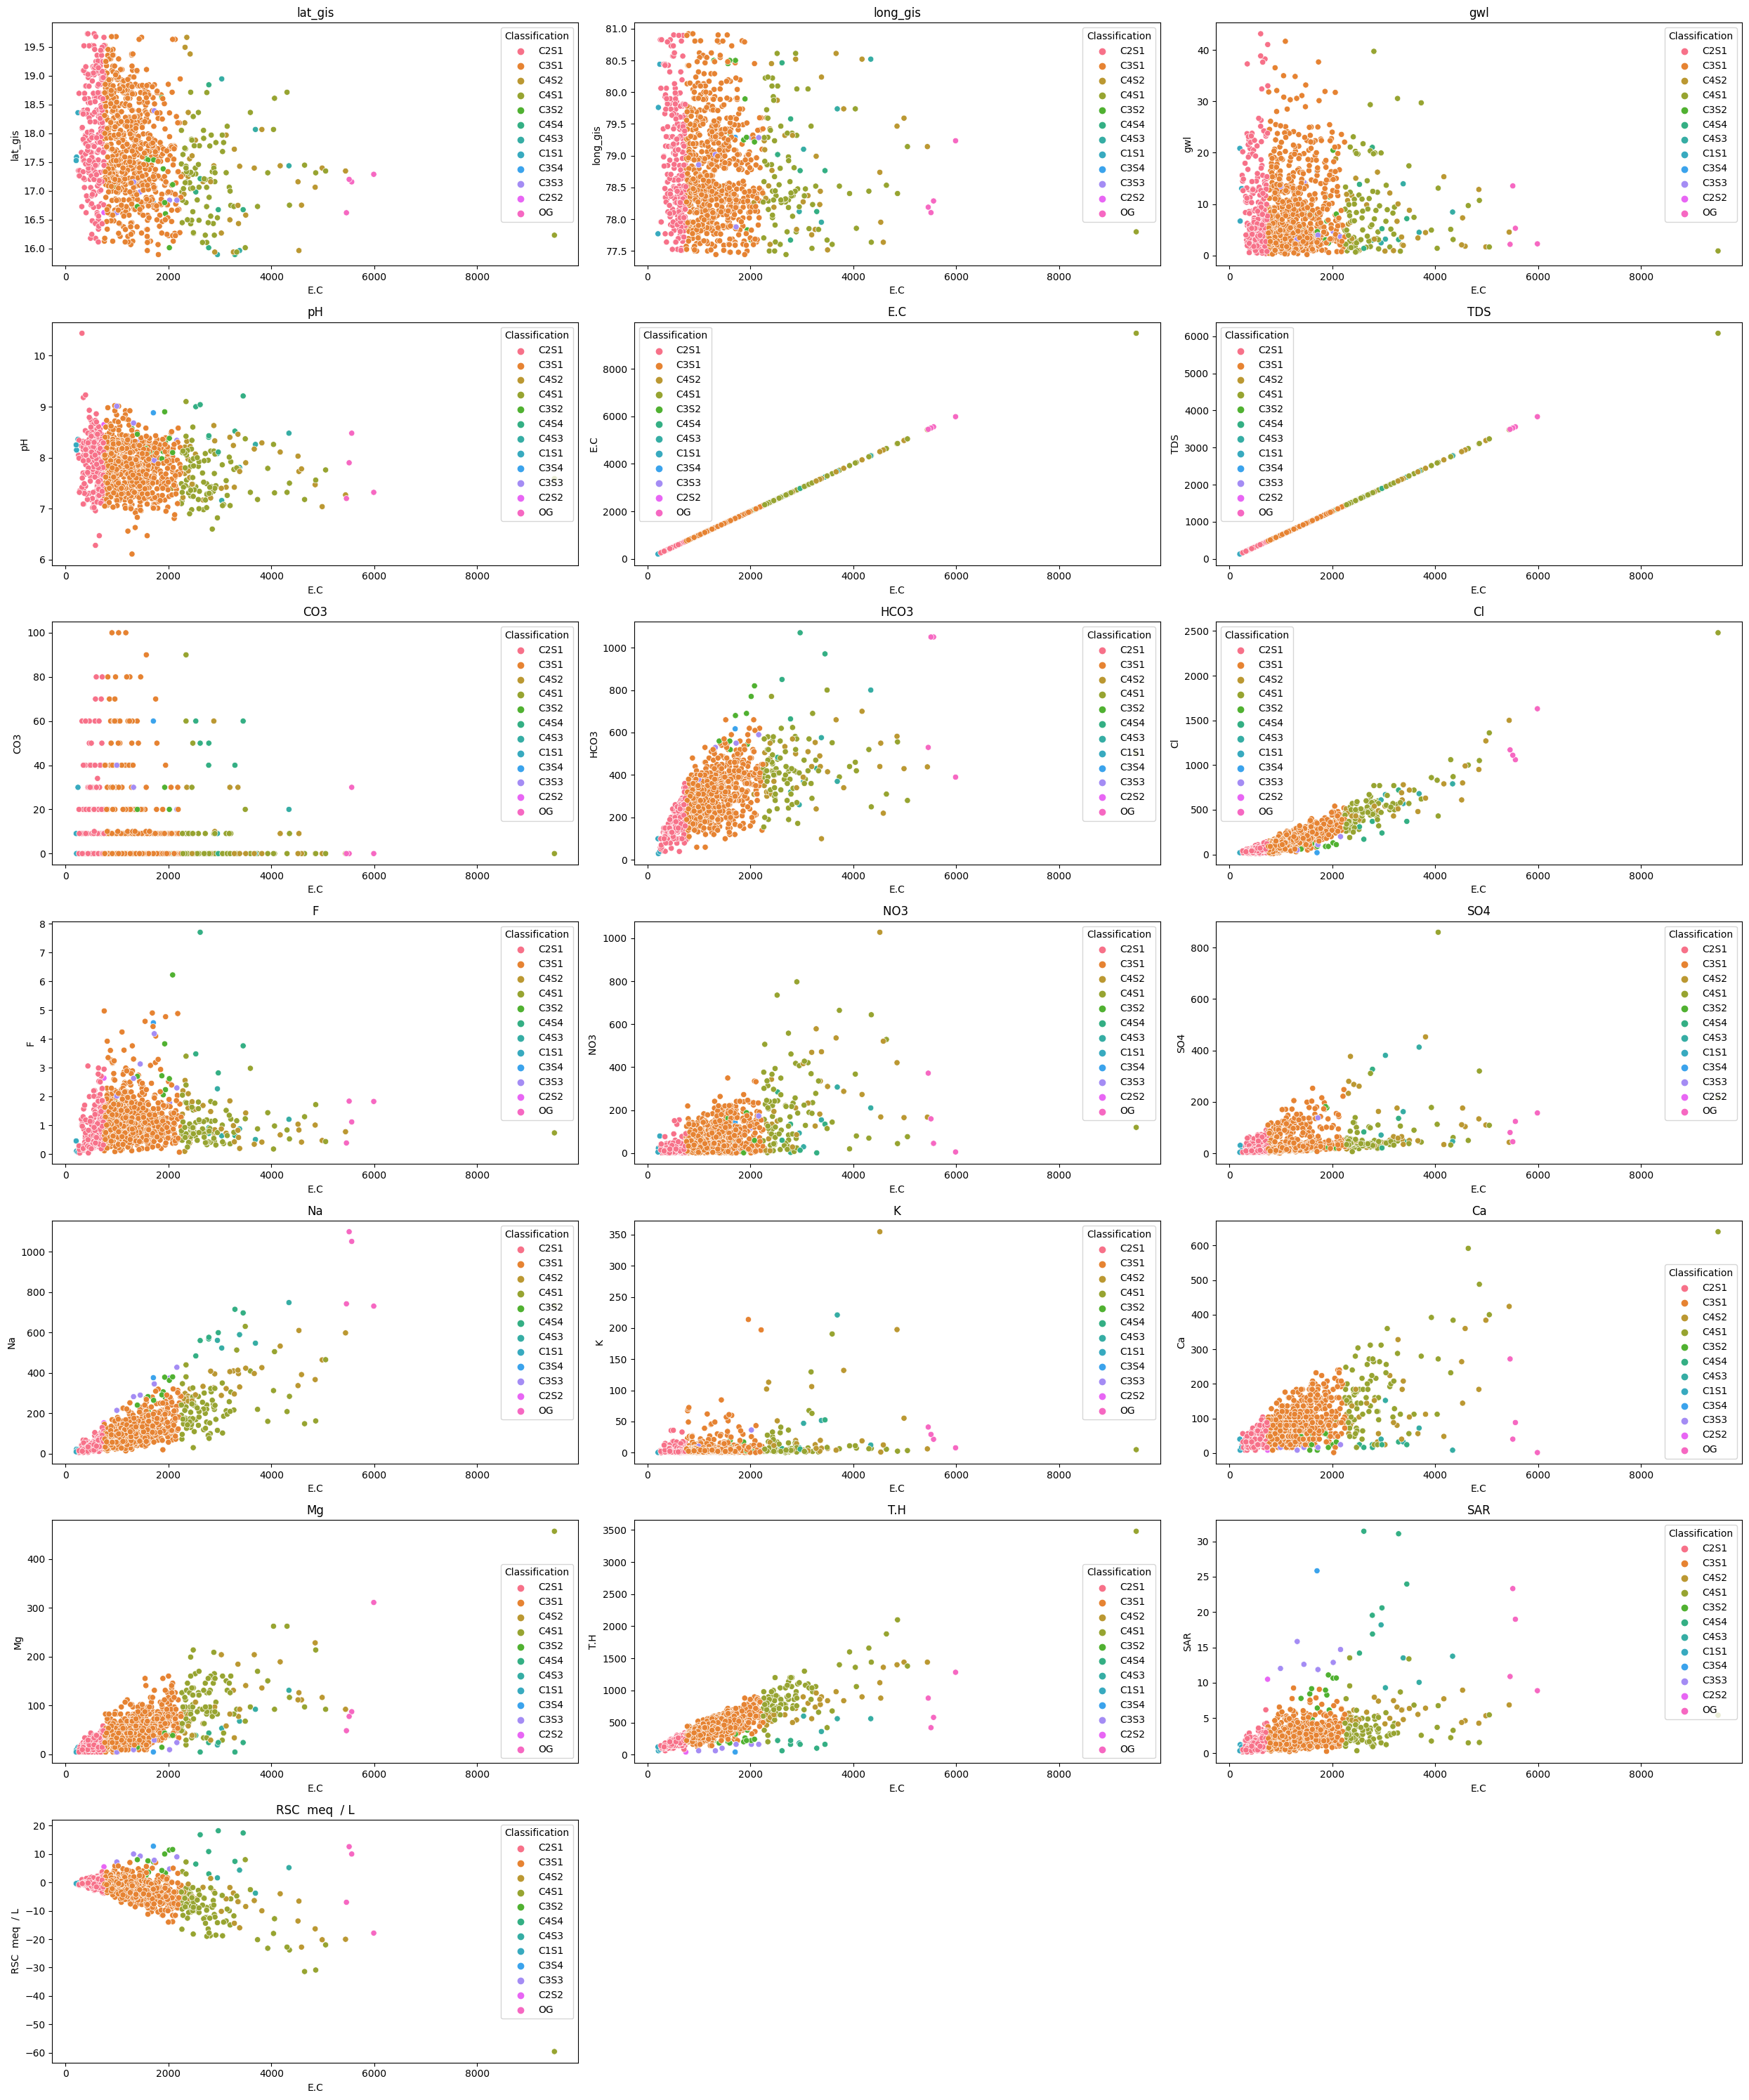

In [ ]:
# @title EXPLORATORY DATA ANALYSIS
fig = plt.figure(figsize=(25,30))
for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    plt.title(numcol[i])
    sns.scatterplot(data=df,x=df['E.C'],y=df[numcol[i]],hue=df['Classification'])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,30))

for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    plt.title(numcol[i])
    sns.scatterplot(data=df,x=df['SAR'],y=df[numcol[i]],hue=df['Classification'])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,25))
for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    sns.histplot(data=df,x=df[numcol[i]],kde=True)
plt.tight_layout()
plt.show()

In [ ]:
var_features=[ 'gwl','E.C', 'TDS','CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR']

In [ ]:

mmsl=MinMaxScaler()
mmsl.fit(df[numcol])

In [ ]:
df[var_features]=np.log1p(df[var_features])

In [ ]:
fig = plt.figure(figsize=(25,25))
for i in range(len(var_features)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=df,x=var_features[i],kde=True)
plt.tight_layout()
plt.show()

In [ ]:
df['Classification'].unique()

In [ ]:
df=df[df['Classification']!='OG']

In [ ]:
df['Classification'] = df['Classification'].replace(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],[0,1,2,3,4,5,6,7,8,9,10])

In [ ]:
df.groupby('Classification')['sno'].count()

In [ ]:
X=df.drop(['sno','Classification','district','mandal','village','E.C','SAR','Classification.1','TDS'],axis=1)
y=df['Classification']

In [ ]:
y.unique()

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.head()

In [ ]:
# @title MODEL 1 K NEAREST NEIGHBOUR CLASSIFIER - FOR CLASSIFICATION

y=df['Classification']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:

kindex=[3,7,11,15,19,23,27,31,35,39 ]
accu_knn_1 = []
for k in kindex :
  knn = KNeighborsClassifier(k)

  knn.fit(X_train, y_train)

  y_pred_knn = knn.predict(X_test)

  acc_knn = accuracy_score(y_test, y_pred_knn)
  conf_knn_1 = confusion_matrix(y_test, y_pred_knn)
  # clf_report = classification_report(y1_test, y1_pred_knn)
  accu_knn_1.append(acc_knn)
  # print(f"Accuracy Score of KNN is : {acc_knn}")
  # print(f"Confusion Matrix : \n{conf}")
  # print(f"Classification Report : \n{clf_report}")

In [ ]:
conf_knn_1

In [ ]:
accu_knn_1

In [ ]:
# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(kindex, accu_knn_1, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Accuracy of Classification')
plt.grid(True)
plt.xticks(kindex)
plt.yticks(accu_knn_1)

plt.show()


In [ ]:
cm_matrix = pd.DataFrame(data=conf_knn_1, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
y_test.value_counts()

In [ ]:
# @title MODEL 1 K NEAREST NEIGHBOUR CLASSIFIER -FOR CLASSIFICATION.1
y=df['Classification.1']

In [ ]:
df['Classification.1'] = df['Classification.1'].replace(['P.S.','U.S.','MR'],[0,1,2])

In [ ]:
df.groupby('Classification.1')['sno'].count()

In [ ]:
y=df['Classification.1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
kindex=[3,7,11,15,19,23,27,31,35,39 ]
accu_knn_2 = []
for k in kindex :
  knn1 = KNeighborsClassifier(k)

  knn1.fit(X_train, y_train)

  y_pred_knn = knn1.predict(X_test)

  acc_knn = accuracy_score(y_test, y_pred_knn)
  conf_knn = confusion_matrix(y_test, y_pred_knn)
  # clf_report = classification_report(y2_test, y2_pred_knn)
  accu_knn_2.append(acc_knn)

In [ ]:
accu_knn_2

In [ ]:
# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(kindex, accu_knn_2, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(kindex)
plt.yticks(accu_knn_2)

plt.show()


In [ ]:
cm_matrix = pd.DataFrame(data=conf_knn, columns=['PS', 'US','MR'],index=['PS', 'US','MR'])
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)

In [ ]:
# @title MODEL 2  LOGISTIC REGRESSION - FOR CLASSIFICATION

y=df['Classification']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
logreg=LogisticRegression(max_iter=20000, multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
acc_logreg=accuracy_score(y_test,y_pred_logreg)
conf=confusion_matrix(y_test,y_pred_logreg)
clf_report= classification_report(y_test,y_pred_logreg)
print(f'Accuracy Score of Logistic Regression is: {acc_logreg}')
print(f'Confusion Matrix:\n{conf}')
print(f'Classification Report: \n{clf_report}')


In [ ]:
cm_matrix = pd.DataFrame(data=conf, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1', 'C3S4', 'C3S3', 'C2S2'])
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
# @title MODEL 2 LOGISTIC REGRESSION  - FOR CLASSIFICATION.1
df['Classification.1'].unique()

In [ ]:
df['Classification.1'] = df['Classification.1'].replace(['P.S.','U.S.','MR'],[0,1,2])

In [ ]:
df.groupby('Classification.1')['sno'].count()

In [ ]:
y=df['Classification.1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
logreg_2=LogisticRegression(max_iter=5000)
logreg_2.fit(X_train,y_train)
y_pred_logreg_2=logreg_2.predict(X_test)
acc_logreg_2=accuracy_score(y_test,y_pred_logreg_2)
conf_2=confusion_matrix(y_test,y_pred_logreg_2)
clf_report_2= classification_report(y_test,y_pred_logreg_2)
print(f'Accuracy Score of Logistic Regression is: {acc_logreg_2}')
print(f'Confusion Matrix:\n{conf_2}')
print(f'Classification Report: \n{clf_report_2}')

In [ ]:
cm_matrix = pd.DataFrame(data=conf_2, columns=['a', 'b','c'],index=['a', 'b','c'])
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)

In [ ]:
# @title MODEL 3 SUPPORT VECTOR MACHINE (SVM) - FOR CLASSIFICATION

In [ ]:

y=df['Classification']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:


# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Fit the models on the training data
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

# Evaluate the models
linear_accuracy = svm_linear.score(X_test, y_test)
poly_accuracy = svm_poly.score(X_test, y_test)
rbf_accuracy = svm_rbf.score(X_test, y_test)
sigmoid_accuracy = svm_sigmoid.score(X_test, y_test)

print("Linear Kernel Accuracy:", linear_accuracy)
print("Polynomial Kernel Accuracy:", poly_accuracy)
print("RBF Kernel Accuracy:", rbf_accuracy)
print("Sigmoid Kernel Accuracy:", sigmoid_accuracy)


In [ ]:



linear_predictions = svm_linear.predict(X_test)
poly_predictions = svm_poly.predict(X_test)
rbf_predictions = svm_rbf.predict(X_test)
sigmoid_predictions = svm_sigmoid.predict(X_test)

# Calculate precision, recall, F1-score
linear_precision = precision_score(y_test, linear_predictions, average='weighted',zero_division=0)
linear_recall = recall_score(y_test, linear_predictions, average='weighted',zero_division=0)
linear_f1 = f1_score(y_test, linear_predictions, average='weighted',zero_division=0)
linear_classification_report = classification_report(y_test, linear_predictions, zero_division=0)

poly_precision = precision_score(y_test, poly_predictions, average='weighted',zero_division=0)
poly_recall = recall_score(y_test, poly_predictions, average='weighted',zero_division=0)
poly_f1 = f1_score(y_test, poly_predictions, average='weighted',zero_division=0)
poly_classification_report = classification_report(y_test, poly_predictions, zero_division=0)

rbf_precision = precision_score(y_test, rbf_predictions, average='weighted',zero_division=0)
rbf_recall = recall_score(y_test, rbf_predictions, average='weighted',zero_division=0)
rbf_f1 = f1_score(y_test, rbf_predictions, average='weighted',zero_division=0)
rbf_classification_report = classification_report(y_test, rbf_predictions, zero_division=0)

sigmoid_precision = precision_score(y_test, sigmoid_predictions, average='weighted',zero_division=0)
sigmoid_recall = recall_score(y_test, sigmoid_predictions, average='weighted',zero_division=0)
sigmoid_f1 = f1_score(y_test, sigmoid_predictions, average='weighted',zero_division=0)
sigmoid_classification_report = classification_report(y_test, sigmoid_predictions, zero_division=0)


print("Linear Kernel Metrics:")
print(f"Precision: {linear_precision}")
print(f"Recall: {linear_recall}")
print(f"F1-score: {linear_f1}")
print("Classification Report:")
print(linear_classification_report)




In [ ]:


# parameter grids for RBF and sigmoid kernels
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # Tuning C and gamma
param_grid_sigmoid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}


In [ ]:


# parameters grid for each kernel
param_grid_linear = {'C': [0.1, 1, 10, 100]}  # linear kernel
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]}  #  polynomial kernel
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # RBF kernel
param_grid_sigmoid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # sigmoid kernel


# Perform grid search with cross-validation for each SVM model
grid_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5)
grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_sigmoid = GridSearchCV(svm_sigmoid, param_grid_sigmoid, cv=5)

# Fit the models on the training data
grid_linear.fit(X_train, y_train)
grid_poly.fit(X_train, y_train)
grid_rbf.fit(X_train, y_train)
grid_sigmoid.fit(X_train, y_train)

# Best parameters and accuracy scores for each kernel
print("Best parameters for linear kernel:", grid_linear.best_params_)
print("Linear Kernel Accuracy:", grid_linear.best_score_)

print("Best parameters for polynomial kernel:", grid_poly.best_params_)
print("Polynomial Kernel Accuracy:", grid_poly.best_score_)

print("Best parameters for RBF kernel:", grid_rbf.best_params_)
print("RBF Kernel Accuracy:", grid_rbf.best_score_)

print("Best parameters for sigmoid kernel:", grid_sigmoid.best_params_)
print("Sigmoid Kernel Accuracy:", grid_sigmoid.best_score_)


In [ ]:
linear_predictions_2= grid_linear.predict(X_test)
poly_predictions_2 = grid_poly.predict(X_test)
rbf_predictions_2 = grid_rbf.predict(X_test)
sigmoid_predictions_2 = grid_sigmoid.predict(X_test)
conf=confusion_matrix(y_test,y_pred_logreg)

In [ ]:
conf_rbf=confusion_matrix(y_test,rbf_predictions_2)

In [ ]:
cm_matrix = pd.DataFrame(data=conf_rbf, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
conf_linear=confusion_matrix(y_test,linear_predictions_2)


In [ ]:
print(conf_linear)

Text(95.72222222222221, 0.5, 'Actual')

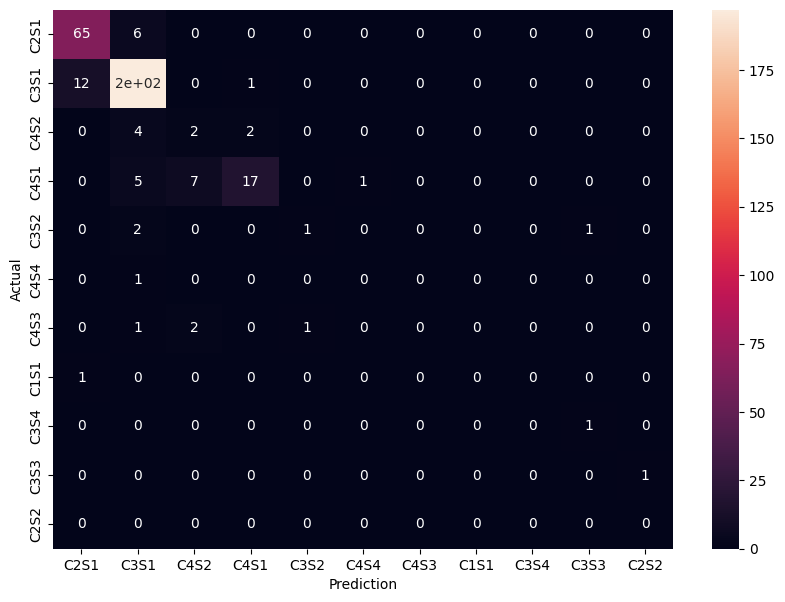

In [ ]:
cm_matrix = pd.DataFrame(data=conf_linear, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1', 'C3S4', 'C3S3', 'C2S2'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
# @title MODEL 3 SUPPOERT VECTOR MACHINE - FOR CLASSIFICATION.1
#SVM

In [ ]:
X1=df.drop(['sno','Classification','district','mandal','village','E.C','SAR','Classification.1','TDS'],axis=1)
y1=df['Classification.1']
df['Classification.1'].unique()
X1=pd.get_dummies(X)

In [ ]:

X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [ ]:


# Initialize SVM classifiers with different kernels
svm_linear_1 = SVC(kernel='linear', random_state=1234)
svm_poly_1 = SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf_1 = SVC(kernel='rbf', random_state=1234)
svm_sigmoid_1 = SVC(kernel='sigmoid', random_state=1234)

# Fit the models on the training data


svm_linear_1.fit(X_train_1, y_train_1)
svm_poly_1.fit(X_train_1, y_train_1)
svm_rbf_1.fit(X_train_1, y_train_1)
svm_sigmoid_1.fit(X_train_1, y_train_1)

# Evaluate the models
linear_accuracy_1 = svm_linear_1.score(X_test_1, y_test_1)
poly_accuracy_1 = svm_poly_1.score(X_test_1, y_test_1)
rbf_accuracy_1 = svm_rbf_1.score(X_test_1, y_test_1)
sigmoid_accuracy_1 = svm_sigmoid_1.score(X_test_1, y_test_1)

print("Linear Kernel Accuracy:", linear_accuracy_1)
print("Polynomial Kernel Accuracy:", poly_accuracy_1)
print("RBF Kernel Accuracy:", rbf_accuracy_1)
print("Sigmoid Kernel Accuracy:", sigmoid_accuracy_1)


Linear Kernel Accuracy: 0.9939577039274925
Polynomial Kernel Accuracy: 0.9093655589123867
RBF Kernel Accuracy: 0.8972809667673716
Sigmoid Kernel Accuracy: 0.8942598187311178


In [ ]:



linear_predictions_1= svm_linear_1.predict(X_test_1)
poly_predictions_1 = svm_poly_1.predict(X_test_1)
rbf_predictions_1 = svm_rbf_1.predict(X_test_1)
sigmoid_predictions_1 = svm_sigmoid_1.predict(X_test_1)

# Calculate precision, recall, F1-score
linear_precision_1 = precision_score(y_test_1, linear_predictions_1, average='weighted')
linear_recall_1 = recall_score(y_test_1, linear_predictions_1, average='weighted')
linear_f1_1 = f1_score(y_test_1, linear_predictions_1, average='weighted')
linear_classification_report_1 = classification_report(y_test_1, linear_predictions_1, zero_division=0)

poly_precision_1 = precision_score(y_test_1, poly_predictions_1, average='weighted')
poly_recall_1 = recall_score(y_test_1, poly_predictions_1, average='weighted')
poly_f1_1 = f1_score(y_test_1, poly_predictions_1, average='weighted')
poly_classification_report_1 = classification_report(y_test_1, poly_predictions_1, zero_division=0)

rbf_precision_1 = precision_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_recall_1 = recall_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_f1_1 = f1_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_classification_report_1 = classification_report(y_test_1, rbf_predictions_1, zero_division=0)

sigmoid_precision_1 = precision_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_recall_1 = recall_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_f1_1 = f1_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_classification_report_1 = classification_report(y_test_1, sigmoid_predictions_1, zero_division=0)


print("Linear Kernel Metrics:")
print(f"Precision: {linear_precision_1}")
print(f"Recall: {linear_recall_1}")
print(f"F1-score: {linear_f1_1}")
print("Classification Report:")
print(linear_classification_report_1)




Linear Kernel Metrics:
Precision: 0.9939577039274925
Recall: 0.9939577039274925
F1-score: 0.9939577039274925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00        18
           2       0.94      0.94      0.94        17

    accuracy                           0.99       331
   macro avg       0.98      0.98      0.98       331
weighted avg       0.99      0.99      0.99       331



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(y_test_1, linear_predictions_1)
cm

array([[295,   0,   1],
       [  0,  18,   0],
       [  1,   0,  16]])

In [ ]:
class_labels = ['PS', 'US', 'MR']

linear


Text(95.72222222222221, 0.5, 'Actual')

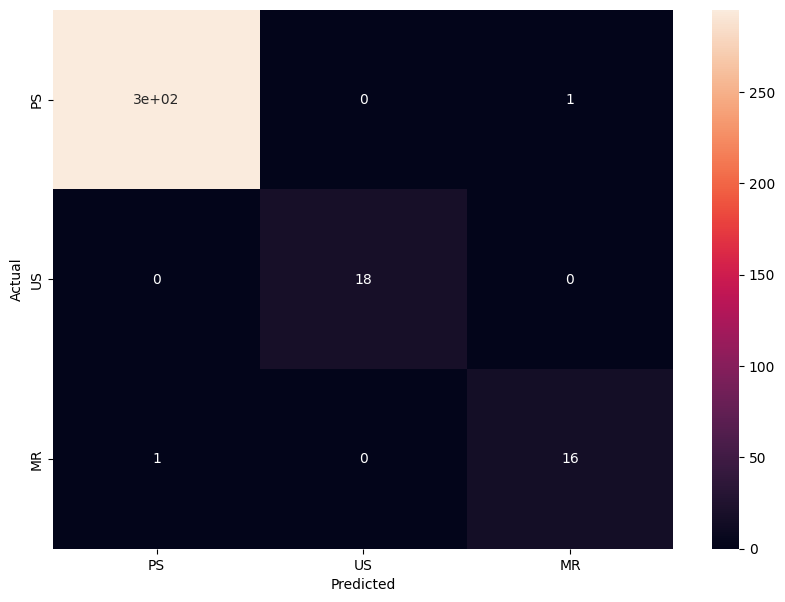

In [ ]:
print("linear")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

poly


Text(95.72222222222221, 0.5, 'Actual')

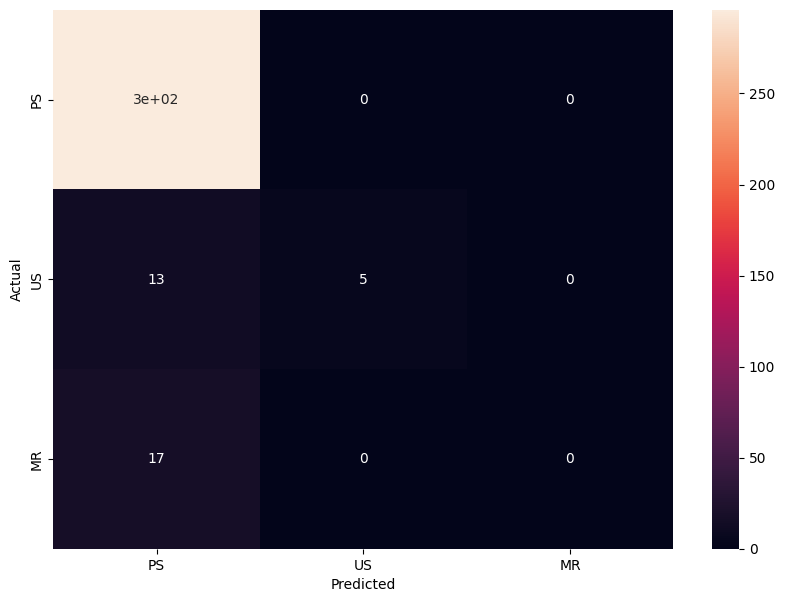

In [ ]:
cm=confusion_matrix(y_test_1, poly_predictions_1)
cm
print("poly")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

rbf


Text(95.72222222222221, 0.5, 'Actual')

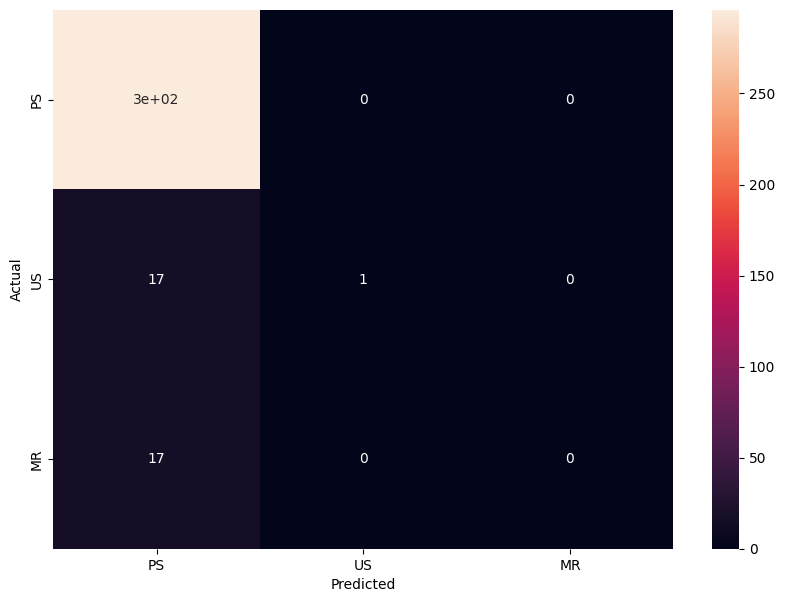

In [ ]:
cm=confusion_matrix(y_test_1, rbf_predictions_1)
cm
print("rbf")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

sigmoid


Text(95.72222222222221, 0.5, 'Actual')

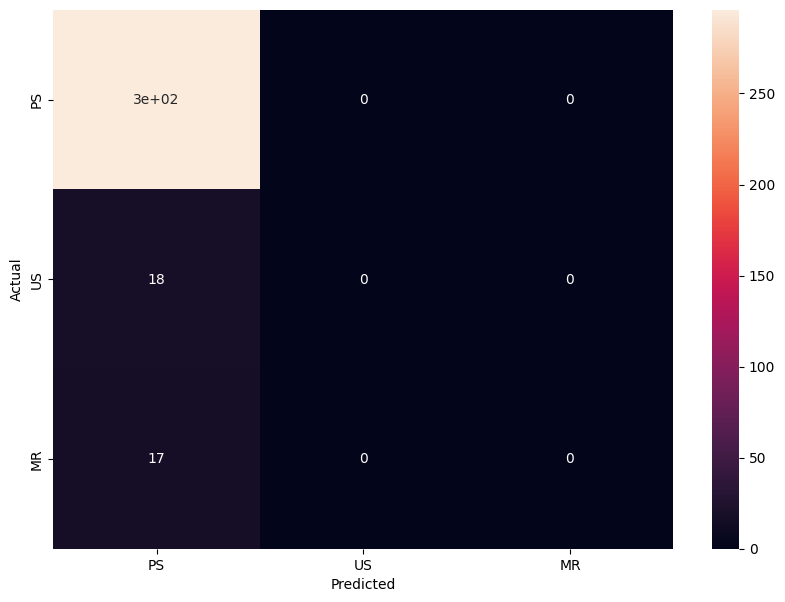

In [ ]:
cm=confusion_matrix(y_test_1, sigmoid_predictions_1)
cm
print("sigmoid")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# @title MODEL 4 DECISION TREE CLASSIFIER - FOR CLASSIFICATON


In [ ]:

y=df['Classification']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [ ]:
clf_accuracy = accuracy_score(y_test, predictions)
clf_f1 = f1_score(y_test, predictions, average='micro')

print(f"Decision Tree Accuracy: {clf_accuracy:.2f}")
print(f"Decision Tree F1 Score: {clf_f1:.2f}")

Decision Tree Accuracy: 0.83
Decision Tree F1 Score: 0.83


In [ ]:
conf_DT=confusion_matrix(y_test,predictions)

Text(95.72222222222221, 0.5, 'Actual')

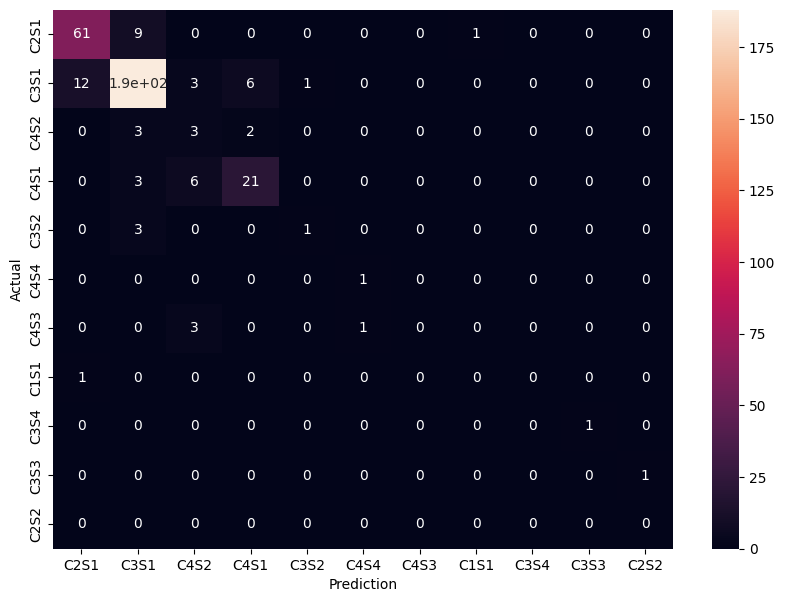

In [ ]:
cm_matrix = pd.DataFrame(data=conf_DT, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1', 'C3S4', 'C3S3', 'C2S2'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
# @title MODEL 4 DECISION TREE CLASSIFIER - FOR CLASSIFICATION.1


In [ ]:

y=df['Classification.1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
clf2=DecisionTreeClassifier()

In [ ]:
clf2.fit(X_train, y_train)
predictions = clf2.predict(X_test)

In [ ]:
clf2_accuracy = accuracy_score(y_test, predictions)
clf2_f1 = f1_score(y_test, predictions, average='micro')

print(f"Decision Tree Accuracy: {clf2_accuracy:.2f}")
print(f"Decision Tree F1 Score: {clf2_f1:.2f}")

Decision Tree Accuracy: 1.00
Decision Tree F1 Score: 1.00


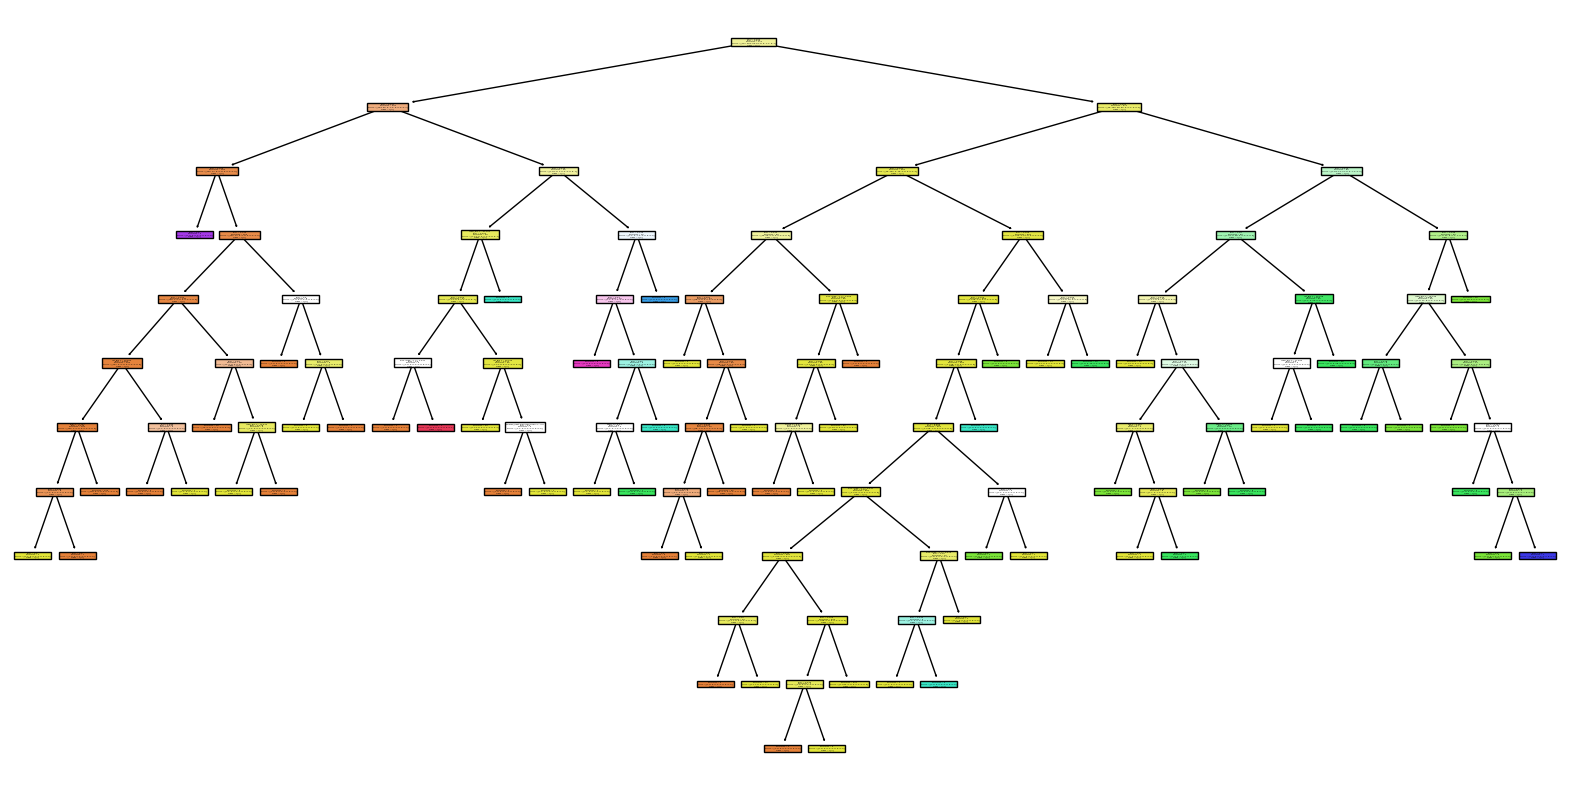

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.show()

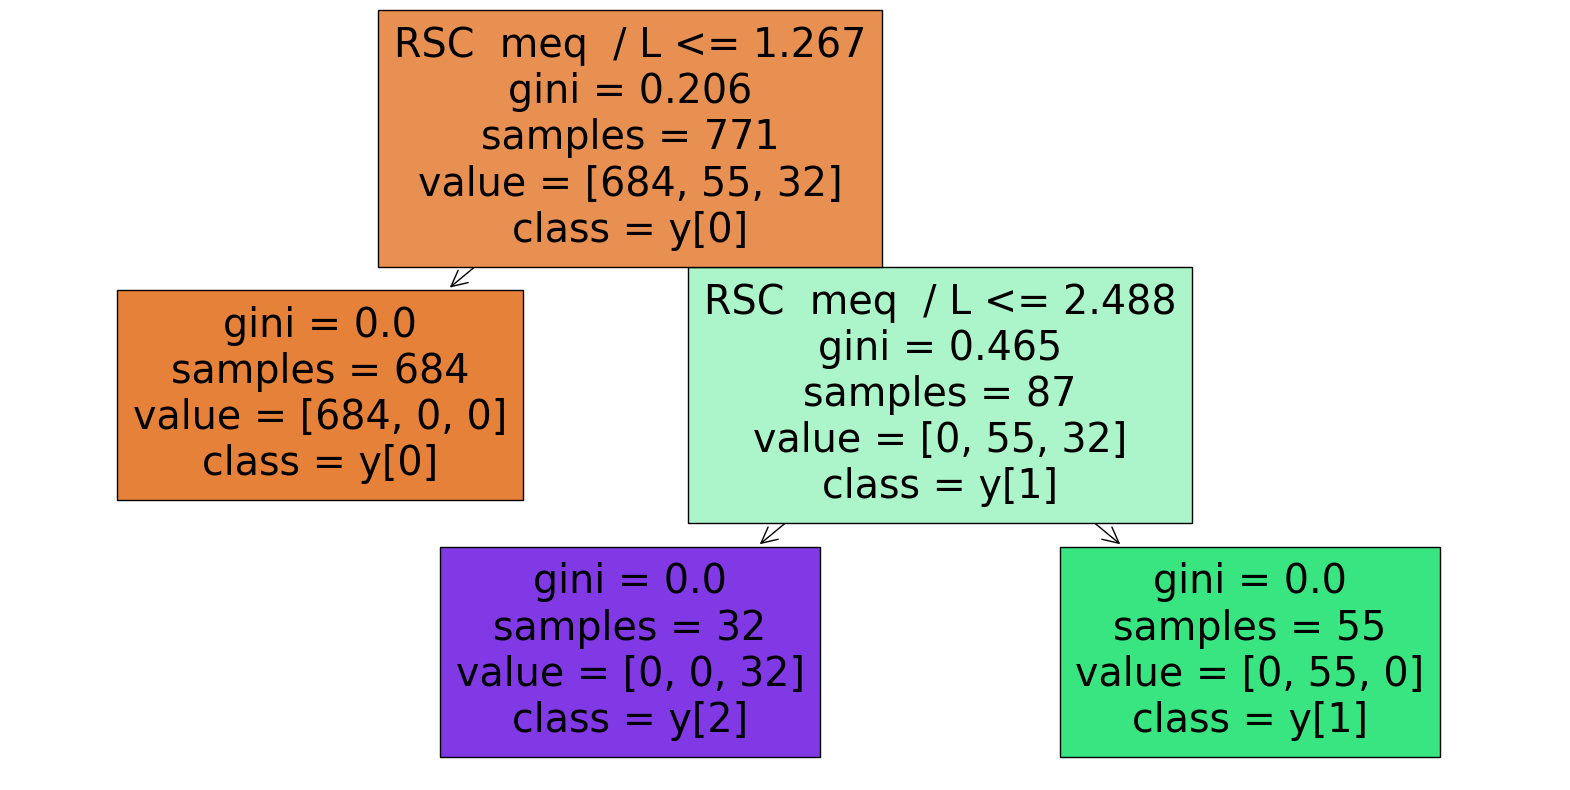

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=True)
plt.show()

DECISION TREE FOR CLASSIFICATION.1


Text(95.72222222222221, 0.5, 'Actual')

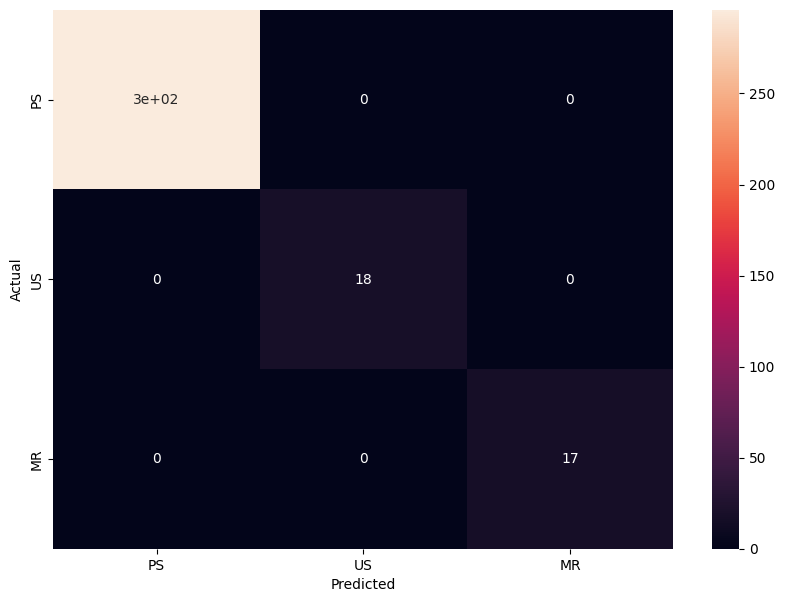

In [ ]:
cm=confusion_matrix(y_test, predictions)
cm
print("DECISION TREE FOR CLASSIFICATION.1")
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# @title MODEL 5 - RANDOM FOREST CLASSIFIER - FOR CLASSIFICATION

y=df['Classification']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
accuracies = []
estimator_values = []

In [ ]:
for i in range(1,100,5):
  RanForModel = RandomForestClassifier(n_estimators=i)
  print(RanForModel.fit(X_train,y_train))
  print(RanForModel.score(X_test,y_test))
  score = RanForModel.score(X_test, y_test)
  accuracies.append(score)
  estimator_values.append(i)

RandomForestClassifier(n_estimators=1)
0.7915407854984894
RandomForestClassifier(n_estimators=6)
0.8610271903323263
RandomForestClassifier(n_estimators=11)
0.8489425981873112
RandomForestClassifier(n_estimators=16)
0.879154078549849
RandomForestClassifier(n_estimators=21)
0.8670694864048338
RandomForestClassifier(n_estimators=26)
0.8821752265861027
RandomForestClassifier(n_estimators=31)
0.8731117824773413
RandomForestClassifier(n_estimators=36)
0.8670694864048338
RandomForestClassifier(n_estimators=41)
0.879154078549849
RandomForestClassifier(n_estimators=46)
0.8821752265861027
RandomForestClassifier(n_estimators=51)
0.8821752265861027
RandomForestClassifier(n_estimators=56)
0.8580060422960725
RandomForestClassifier(n_estimators=61)
0.8761329305135952
RandomForestClassifier(n_estimators=66)
0.879154078549849
RandomForestClassifier(n_estimators=71)
0.8670694864048338
RandomForestClassifier(n_estimators=76)
0.8761329305135952
RandomForestClassifier(n_estimators=81)
0.8821752265861027
Ra

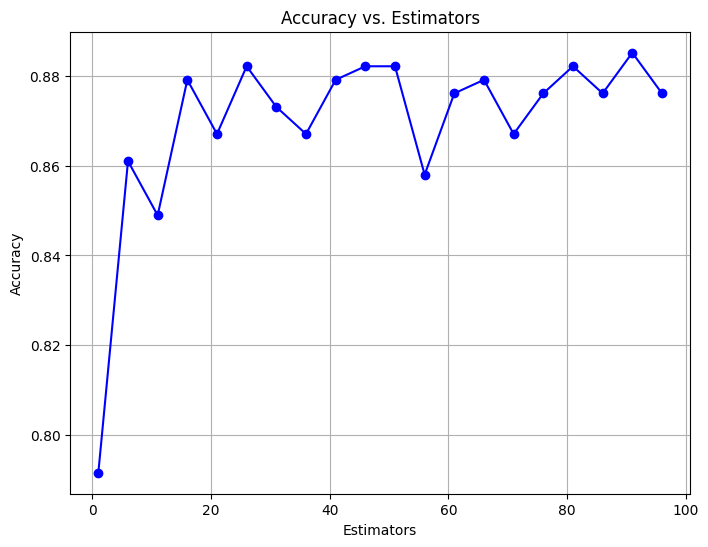

In [ ]:


def plot_accuracy(estimators, accuracy_values):
    plt.figure(figsize=(8, 6))
    plt.plot(estimators, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs. Estimators')
    plt.xlabel('Estimators')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


plot_accuracy(estimator_values, accuracies)


In [ ]:
accuracies_1 =[]
estimator_values_1 =[]

In [ ]:
for i in range(31,41,1):
  RanForModel = RandomForestClassifier(n_estimators=i)
  print(RanForModel.fit(X_train,y_train))
  print(RanForModel.score(X_test,y_test))
  score_1 = RanForModel.score(X_test, y_test)
  accuracies_1.append(score_1)
  estimator_values_1.append(i)

RandomForestClassifier(n_estimators=31)
0.8731117824773413
RandomForestClassifier(n_estimators=32)
0.8700906344410876
RandomForestClassifier(n_estimators=33)
0.879154078549849
RandomForestClassifier(n_estimators=34)
0.8731117824773413
RandomForestClassifier(n_estimators=35)
0.8761329305135952
RandomForestClassifier(n_estimators=36)
0.8670694864048338
RandomForestClassifier(n_estimators=37)
0.879154078549849
RandomForestClassifier(n_estimators=38)
0.879154078549849
RandomForestClassifier(n_estimators=39)
0.8670694864048338
RandomForestClassifier(n_estimators=40)
0.8731117824773413


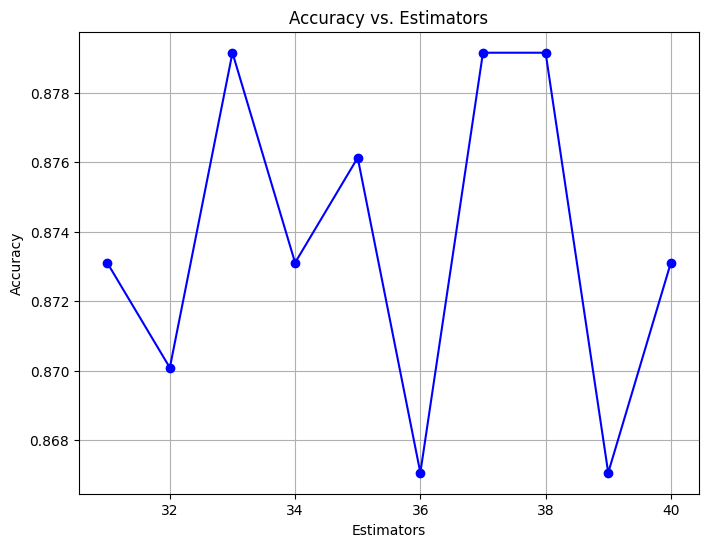

In [ ]:
def plot_accuracy(estimator_values_1, accuracies_1):
    plt.figure(figsize=(8, 6))
    plt.plot(estimator_values_1, accuracies_1, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs. Estimators')
    plt.xlabel('Estimators')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
plot_accuracy(estimator_values_1, accuracies_1)


In [ ]:
RanForModel = RandomForestClassifier(n_estimators=33)
print(RanForModel.fit(X_train,y_train))
print(RanForModel.score(X_test,y_test))

RandomForestClassifier(n_estimators=33)
0.879154078549849


In [ ]:
y_predicted = RanForModel.predict(X_test)

In [ ]:
conf_RF=confusion_matrix(y_test,y_predicted)

Text(95.72222222222221, 0.5, 'Actual')

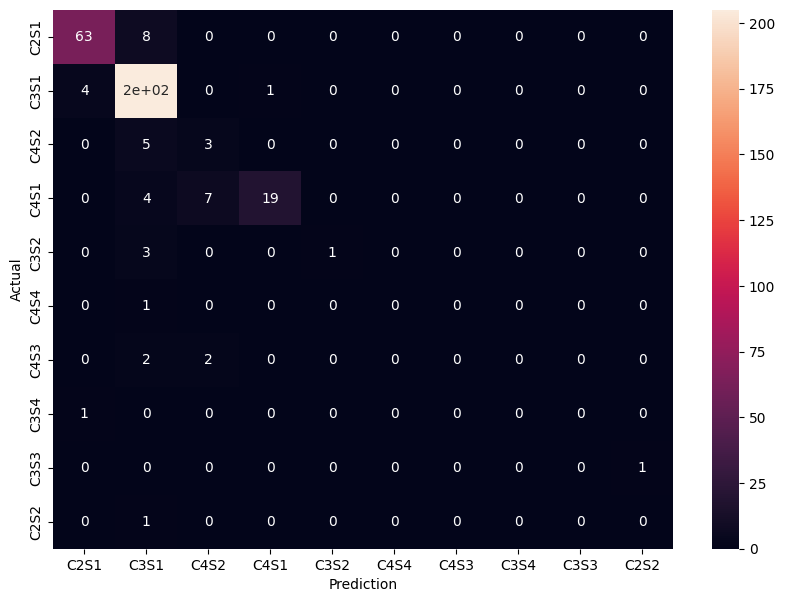

In [ ]:
cm_matrix = pd.DataFrame(data=conf_RF, columns=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'],
                         index=['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C3S4', 'C3S3', 'C2S2'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Actual", fontsize=10)



In [ ]:
# @title MODEL 5 RANDOM FOREST CLASSIFIER - FOR CLASSIFICATION.1
df['Classification.1'].unique()

array([0, 1, 2])

In [ ]:
df['Classification.1'] = df['Classification.1'].replace(['P.S.','U.S.','MR'],[0,1,2])

In [ ]:
df.groupby('Classification.1')['sno'].count()

Classification.1
0    980
1     73
2     49
Name: sno, dtype: int64

In [ ]:
y=df['Classification.1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
accuracies_2 = []
estimated_values_2 =[]

In [ ]:
for i in range(1,100,5):
  RanForModel = RandomForestClassifier(n_estimators=i)
  print(RanForModel.fit(X_train,y_train))
  print(RanForModel.score(X_test,y_test))
  score_2 = RanForModel.score(X_test, y_test)
  accuracies_2.append(score_2)
  estimated_values_2.append(i)

RandomForestClassifier(n_estimators=1)
0.9063444108761329
RandomForestClassifier(n_estimators=6)
0.9758308157099698
RandomForestClassifier(n_estimators=11)
0.972809667673716
RandomForestClassifier(n_estimators=16)
0.9758308157099698
RandomForestClassifier(n_estimators=21)
0.9818731117824774
RandomForestClassifier(n_estimators=26)
0.9909365558912386
RandomForestClassifier(n_estimators=31)
0.9909365558912386
RandomForestClassifier(n_estimators=36)
0.9939577039274925
RandomForestClassifier(n_estimators=41)
0.9909365558912386
RandomForestClassifier(n_estimators=46)
0.9939577039274925
RandomForestClassifier(n_estimators=51)
1.0
RandomForestClassifier(n_estimators=56)
0.9909365558912386
RandomForestClassifier(n_estimators=61)
0.9879154078549849
RandomForestClassifier(n_estimators=66)
0.9969788519637462
RandomForestClassifier(n_estimators=71)
0.9939577039274925
RandomForestClassifier(n_estimators=76)
0.9969788519637462
RandomForestClassifier(n_estimators=81)
0.9939577039274925
RandomForestCla

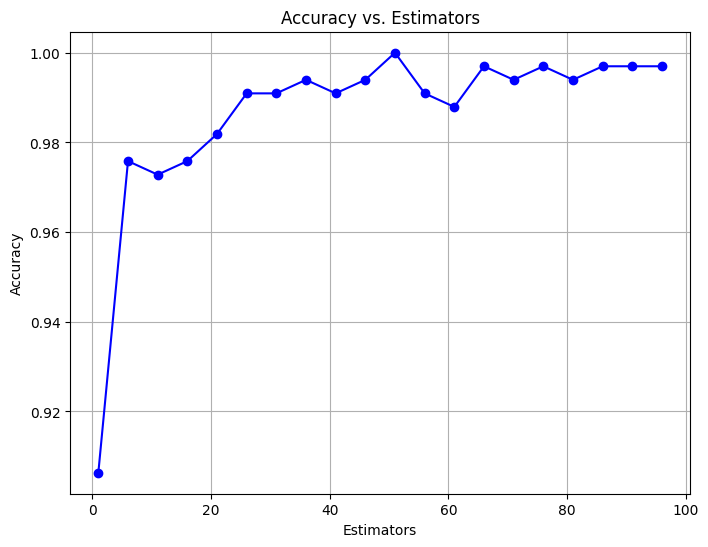

In [ ]:
def plot_accuracy(estimated_values_2, accuracies_2):
    plt.figure(figsize=(8, 6))
    plt.plot(estimated_values_2, accuracies_2, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs. Estimators')
    plt.xlabel('Estimators')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
plot_accuracy(estimated_values_2, accuracies_2)


In [ ]:
for i in range(31,41,1):
  RanForModel = RandomForestClassifier(n_estimators=i)
  print(RanForModel.fit(X_train,y_train))
  print(RanForModel.score(X_test,y_test))

RandomForestClassifier(n_estimators=31)
0.9939577039274925
RandomForestClassifier(n_estimators=32)
0.9939577039274925
RandomForestClassifier(n_estimators=33)
0.9969788519637462
RandomForestClassifier(n_estimators=34)
1.0
RandomForestClassifier(n_estimators=35)
0.9969788519637462
RandomForestClassifier(n_estimators=36)
0.9969788519637462
RandomForestClassifier(n_estimators=37)
0.9969788519637462
RandomForestClassifier(n_estimators=38)
1.0
RandomForestClassifier(n_estimators=39)
0.9909365558912386
RandomForestClassifier(n_estimators=40)
0.9939577039274925


In [ ]:
RanForModel = RandomForestClassifier(n_estimators=32)
print(RanForModel.fit(X_train,y_train))
print(RanForModel.score(X_test,y_test))

RandomForestClassifier(n_estimators=32)
0.9969788519637462


In [ ]:
y_predicted = RanForModel.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[296,   0,   0],
       [  0,  18,   0],
       [  0,   1,  16]])

Text(95.72222222222221, 0.5, 'Actual')

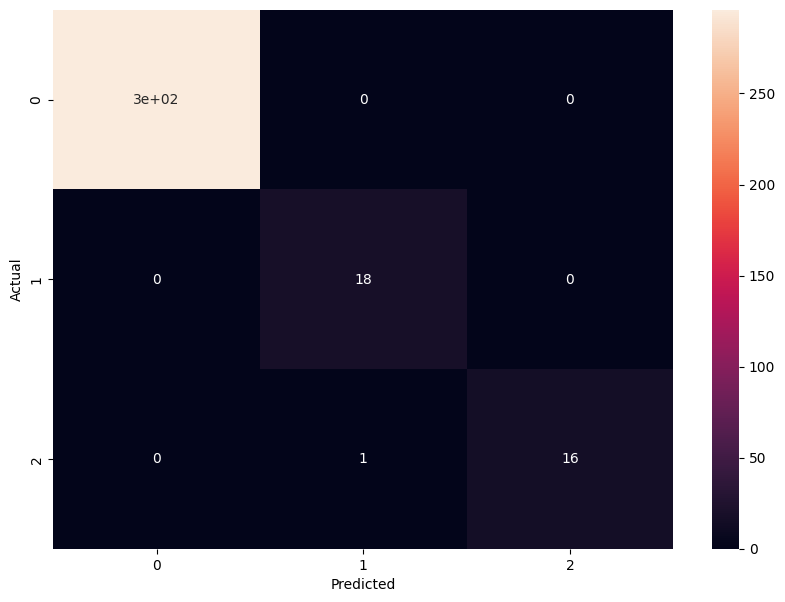

In [ ]:

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')